# Network of networks

Networks where created, this networks have topologies and functions. The topological and dynamic distance was compared.

Each network has a name that corresponds to: 
* MOTIF: motif of network
* ID, ID: parameter of order
* MODEL: Number of model/function

Only comparisons between different networks where taken into account.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Funtional Loops

Distribution of fun_loops by motif

    C GEN4 +
    D GEN3 +
    E GEN3 + GEN4 +
    F GEN3 GEN4 + GEN3 +
    G GEN3 GEN4 - GEN3 +
    H GEN3 GEN4 + GEN4 +
    I GEN3 GEN4 - GEN4 +
    J GEN1 GEN2 - GEN1 +

In [2]:
loops = []
df_loops = pd.DataFrame(index=[1,2,3,4], columns=['C','D','E','F','G','H','I','J'])
df_loops = df_loops.fillna(0)
with open("5nodos/Loops_Functionality.csv") as f:
    for line in f.readlines(): 
        line = line.strip().split(',')
        if line[-1] != '': 
            loops.append(   (line[0], line[1])   )
            m = int(line[0][0])
            df_loops[line[1]][m] += 1    
df_loops

,C,D,E,F,G,H,I,J
1,184,172,8,8,8,20,20,16
2,184,172,8,8,8,20,20,16
3,188,180,8,8,8,20,20,16
4,188,180,8,8,8,20,20,16


Este patrón esta raro, por que todos los motifs tienen una distribución similar de loops funcionales, para 3 nodos no fue asi. 

## Distance distribution

Distribution of topological distances

Create histograms

In [3]:
#d_top = {}
#d_dyn = {}
#d_vs_d = {}

#with open("5nodos/crossdistances.out") as f:
#    for line in f:
#        line = line.strip().split(',')
#        if line[2] in d_top: d_top[line[2]] += 1
#        else: d_top[line[2]] = 1
#        if line[3] in d_dyn: d_dyn[line[3]] += 1
#        else: d_dyn[line[3]] = 1
#        if (line[2], line[3]) in d_vs_d: d_vs_d[(line[2], line[3])] += 1
#        else: d_vs_d[(line[2], line[3])] = 1
with open("5nodos/res5nodos.dat") as f:
    for line in f: exec(line)

sorted(d_top, key=lambda key:d_top[key])
sorted(d_dyn, key=lambda key:d_dyn[key])
sorted(d_vs_d, key=lambda key:d_vs_d[key])


[(6, 56),
 (3, 360),
 (2, 416),
 (4, 512),
 (2, 448),
 (1, 104),
 (6, 64),
 (2, 328),
 (3, 16),
 (2, 232),
 (4, 480),
 (2, 8),
 (1, 200),
 (0, 56),
 (7, 120),
 (0, 160),
 (8, 232),
 (2, 120),
 (1, 288),
 (3, 24),
 (7, 96),
 (5, 512),
 (0, 112),
 (3, 264),
 (2, 312),
 (7, 112),
 (5, 464),
 (2, 368),
 (2, 264),
 (6, 408),
 (0, 192),
 (1, 88),
 (8, 192),
 (4, 376),
 (1, 320),
 (3, 448),
 (3, 344),
 (1, 184),
 (5, 480),
 (1, 240),
 (1, 8),
 (8, 456),
 (6, 512),
 (2, 136),
 (3, 248),
 (2, 336),
 (2, 216),
 (2, 384),
 (2, 304),
 (0, 48),
 (2, 296),
 (3, 400),
 (7, 512),
 (8, 512),
 (0, 80),
 (1, 136),
 (0, 40),
 (6, 72),
 (2, 280),
 (0, 8),
 (2, 104),
 (2, 24),
 (3, 416),
 (0, 128),
 (6, 80),
 (1, 72),
 (8, 208),
 (7, 136),
 (1, 208),
 (6, 496),
 (6, 480),
 (4, 360),
 (4, 448),
 (8, 248),
 (3, 280),
 (1, 176),
 (8, 440),
 (3, 328),
 (1, 168),
 (4, 432),
 (1, 256),
 (0, 96),
 (2, 352),
 (0, 64),
 (7, 128),
 (5, 392),
 (3, 40),
 (0, 24),
 (2, 272),
 (8, 496),
 (3, 232),
 (1, 152),
 (2, 200),
 

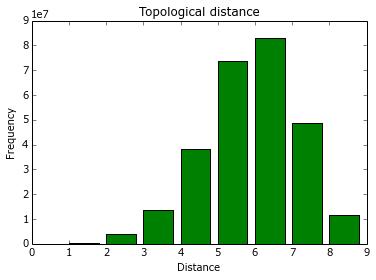

In [25]:
plt.bar(list(d_top.keys()), list(d_top.values()), color='g' )
plt.title("Topological distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

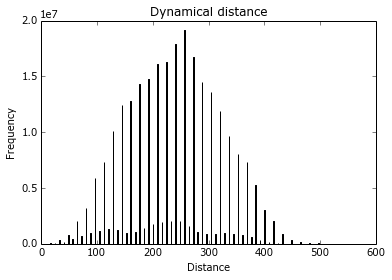

In [28]:
plt.bar(list(d_dyn.keys()), list(d_dyn.values()), width=1, color='b' )
plt.title("Dynamical distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

In [30]:
x = [d[0] for d in d_vs_d.keys()]
y = [d[1] for d in d_vs_d.keys()]
plt.plot(x, y, color='r' )
plt.title("Dynamical distance")
plt.xlabel("Topological distance")
plt.ylabel("Frequency")
plt.show()

[2,
 5,
 4,
 3,
 8,
 7,
 2,
 7,
 6,
 5,
 4,
 3,
 1,
 4,
 7,
 6,
 5,
 4,
 2,
 1,
 4,
 3,
 8,
 7,
 6,
 2,
 1,
 7,
 6,
 4,
 3,
 0,
 8,
 7,
 3,
 2,
 1,
 0,
 8,
 6,
 2,
 6,
 5,
 4,
 3,
 8,
 2,
 7,
 5,
 4,
 3,
 1,
 7,
 6,
 5,
 2,
 1,
 5,
 3,
 8,
 7,
 7,
 6,
 5,
 4,
 3,
 0,
 5,
 4,
 2,
 1,
 0,
 3,
 8,
 7,
 6,
 2,
 6,
 5,
 4,
 3,
 8,
 2,
 8,
 5,
 4,
 3,
 2,
 0,
 7,
 6,
 5,
 2,
 5,
 3,
 8,
 7,
 7,
 6,
 4,
 3,
 1,
 0,
 6,
 5,
 4,
 2,
 8,
 7,
 6,
 2,
 7,
 6,
 5,
 4,
 3,
 2,
 7,
 4,
 3,
 2,
 1,
 0,
 8,
 7,
 6,
 5,
 2,
 6,
 5,
 4,
 3,
 8,
 7,
 6,
 5,
 4,
 3,
 7,
 6,
 5,
 4,
 2,
 1,
 5,
 3,
 8,
 7,
 2,
 7,
 6,
 4,
 3,
 4,
 3,
 2,
 1,
 4,
 8,
 7,
 6,
 2,
 6,
 5,
 4,
 3,
 8,
 6,
 5,
 4,
 3,
 2,
 1,
 3,
 6,
 5,
 2,
 1,
 5,
 3,
 8,
 7,
 2,
 7,
 6,
 5,
 4,
 3,
 1,
 6,
 5,
 4,
 2,
 1,
 4,
 7,
 6,
 2,
 6,
 4,
 3,
 8,
 6,
 3,
 2,
 1,
 0,
 8,
 7,
 6,
 5,
 2,
 5,
 4,
 3,
 8,
 0,
 7,
 5,
 4,
 3,
 1,
 6,
 7,
 6,
 5,
 4,
 2,
 1,
 5,
 4,
 3,
 7,
 2,
 7,
 6,
 4,
 3,
 8,
 4,
 3,
 2,
 0,
 3,
 8,
 6,
 2,
 6,
 5,
 4,


## Network

Separate d_top = 0

## Dendogram

Clustering!

First, lets get the matrixes and remove nans. The matrixes are in the order of G.nodes()